In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df2=pd.read_csv('DS1_C5_S1_BankChurn_Data_Concept.csv')
df2

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,8395,62,0.000


In [3]:
df2.isnull().sum()

CLIENTNUM                     0
Attrition_Flag                0
Customer_Age                  0
Gender                       93
Dependent_count               0
Education_Level               0
Marital_Status                0
Income_Category               0
Card_Category               132
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                 60
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Trans_Amt               0
Total_Trans_Ct                0
Avg_Utilization_Ratio         0
dtype: int64

In [4]:
def seperator(data, margin):
    cat=[]
    num=[]
    for col in data.columns:
        if data[col].nunique()< margin:
            cat.append(col)
        else:
            num.append(col)
    return cat, num 

In [5]:
seperator(df2, 60)

(['Attrition_Flag',
  'Gender',
  'Dependent_count',
  'Education_Level',
  'Marital_Status',
  'Income_Category',
  'Card_Category',
  'Months_on_book',
  'Total_Relationship_Count',
  'Months_Inactive_12_mon',
  'Contacts_Count_12_mon'],
 ['CLIENTNUM',
  'Customer_Age',
  'Credit_Limit',
  'Total_Revolving_Bal',
  'Avg_Open_To_Buy',
  'Total_Trans_Amt',
  'Total_Trans_Ct',
  'Avg_Utilization_Ratio'])

In [6]:
categorical, numerical = seperator(df2,60)

In [7]:
categorical

['Attrition_Flag',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon']

In [8]:
numerical

['CLIENTNUM',
 'Customer_Age',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Avg_Utilization_Ratio']

### Attrition flag level 1 Analysis

In [9]:
attrition_flag= df2['Attrition_Flag'].value_counts()
attrition_flag

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [10]:
df2['Attrition_Flag'].mode()

0    Existing Customer
Name: Attrition_Flag, dtype: object

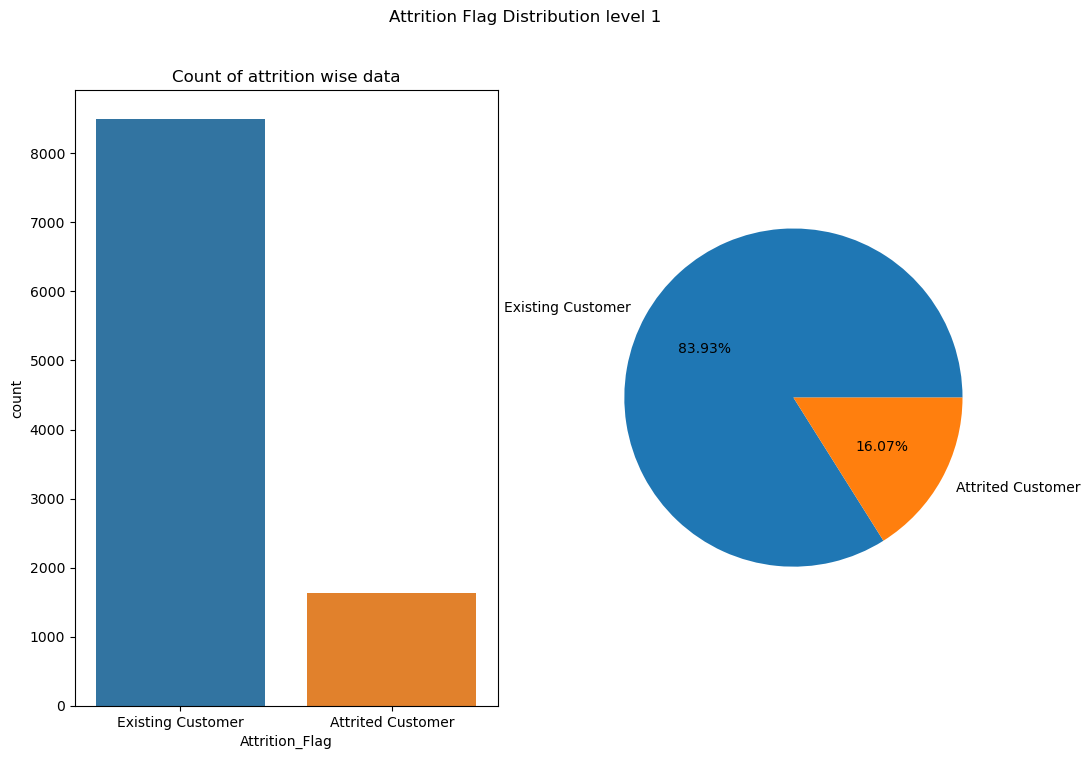

In [11]:
fig, ax= plt.subplots(1,2, figsize=(12,8))
ax[0].set_title('Count of attrition wise data')
sns.countplot(x= df2['Attrition_Flag'], ax= ax[0])
plt.pie(attrition_flag, labels= attrition_flag.index, autopct= '%0.2f%%')
plt.suptitle('Attrition Flag Distribution level 1')
plt.show()

#### Interpretation Attrition flag: there are 83.93% of Existing customer and 16.07% of Attried Customers

### Gender level 1 Analysis

In [12]:
df2.Gender.isnull().sum()

93

In [13]:
gender=df2['Gender'].value_counts()
gender

Gender
F    5313
M    4721
Name: count, dtype: int64

In [14]:
df2.Gender.mode()[0]

'F'

In [15]:
df2.Gender.fillna(df2.Gender.mode()[0], inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_11524\351794353.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2.Gender.fillna(df2.Gender.mode()[0], inplace=True)


In [16]:
df2.Gender.isnull().sum()

0

In [17]:
df2['Gender'].mode()

0    F
Name: Gender, dtype: object

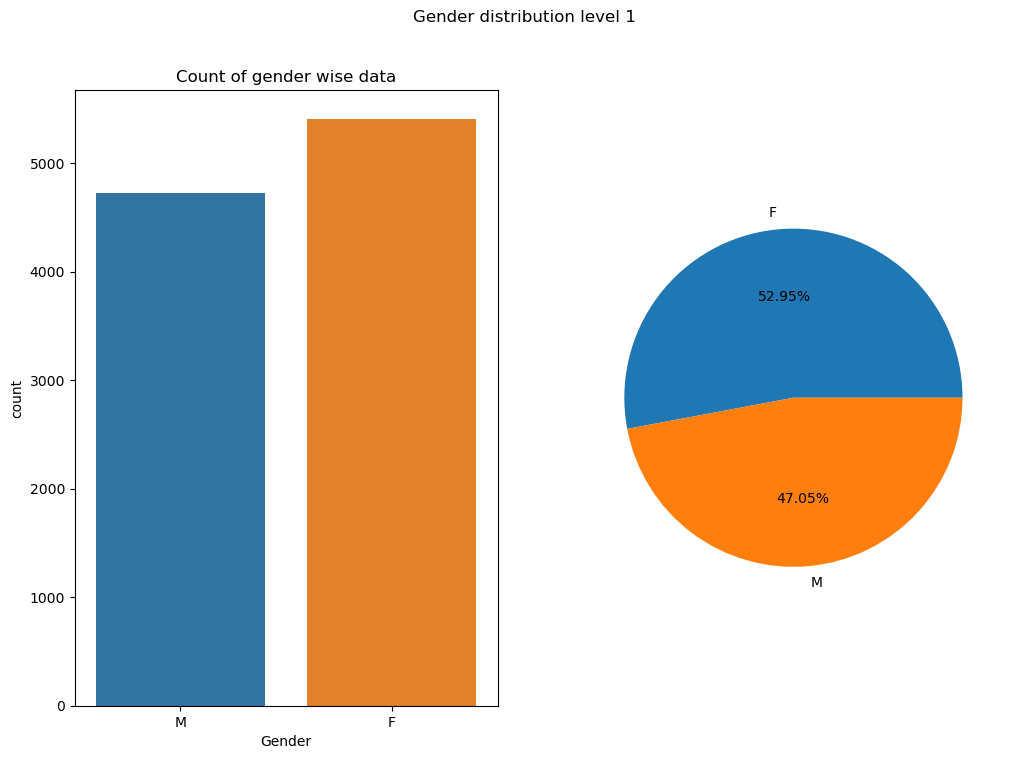

In [18]:
fig, ax=plt.subplots(1,2, figsize=(12,8))
ax[0].set_title('Count of gender wise data')
sns.countplot(x= df2['Gender'],ax=ax[0])
plt.pie(gender, labels=gender.index, autopct='%0.2f%%')
plt.suptitle('Gender distribution level 1')
plt.show()

#### Interpretation Attrition flag: there are 52.95% of Males and 47.05% of Females

### Dependent count level 1 Analysis

In [19]:
dependent_count=df2['Dependent_count'].value_counts()
dependent_count

Dependent_count
3      2718
2      2636
1      1825
4      1562
0       898
5       425
110       2
102       2
130       2
48        2
95        2
82        2
78        2
25        2
10        2
103       2
29        2
113       2
97        2
125       1
80        1
24        1
63        1
11        1
52        1
87        1
142       1
117       1
13        1
67        1
89        1
61        1
72        1
120       1
116       1
69        1
109       1
19        1
9         1
22        1
90        1
35        1
60        1
42        1
119       1
104       1
88        1
34        1
143       1
100       1
59        1
7         1
92        1
17        1
27        1
76        1
Name: count, dtype: int64

In [20]:
df2.Dependent_count.isnull().sum()

0

In [21]:
q1= df2['Dependent_count'].quantile(0.25)
q3= df2['Dependent_count'].quantile(0.75)
iqr= q3-q1
lf= q1-1.5*iqr
uf= q3+1.5*iqr

In [22]:
med= df2['Dependent_count'].median()

In [23]:
print(lf,uf,med)

-2.0 6.0 2.0


In [24]:
condition = (df2['Dependent_count']<lf) | (df2['Dependent_count']>uf )
df2.loc[condition, 'Dependent_count'] = med

In [25]:
df2.loc[df2['Dependent_count']>5, 'Dependent_count']=df2['Dependent_count'].median()

In [26]:
dependent_count=df2['Dependent_count'].value_counts()
dependent_count

Dependent_count
3    2718
2    2699
1    1825
4    1562
0     898
5     425
Name: count, dtype: int64

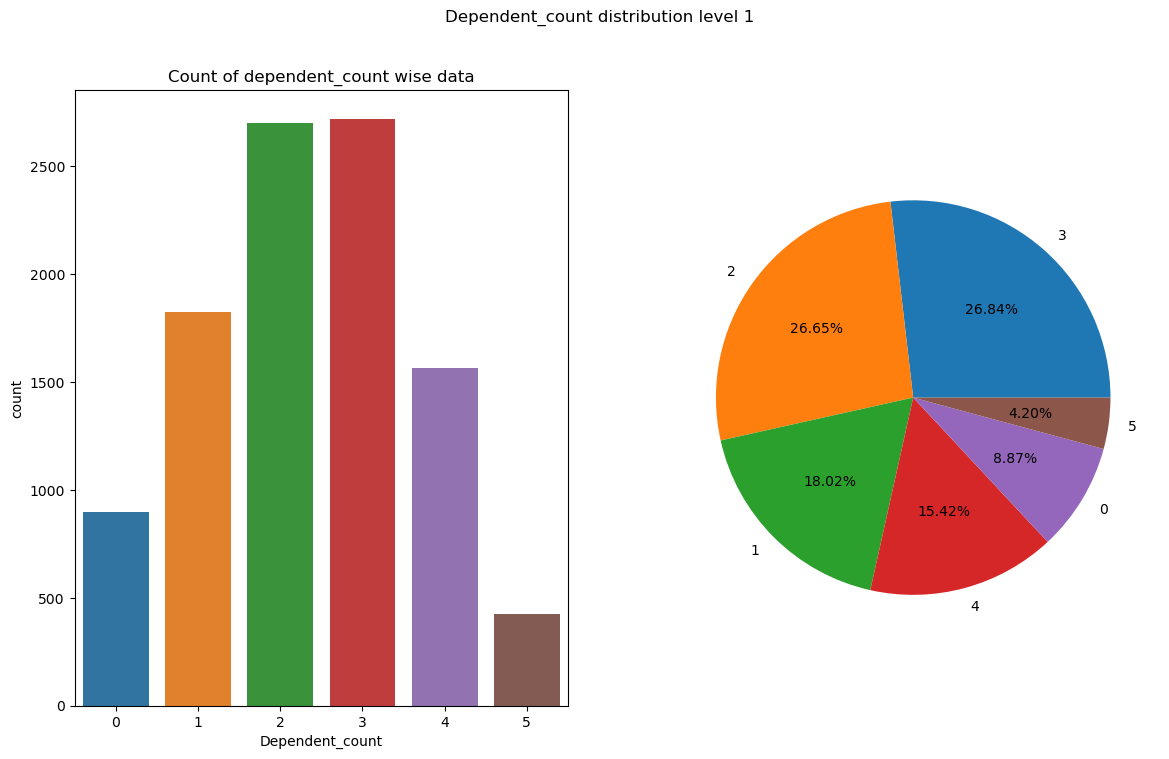

In [27]:
fig, ax=plt.subplots(1,2, figsize=(14,8))
ax[0].set_title('Count of dependent_count wise data')
sns.countplot(x= df2['Dependent_count'],ax=ax[0])
plt.pie(dependent_count, labels=dependent_count.index, autopct='%0.2f%%')
plt.suptitle('Dependent_count distribution level 1')
plt.show()

### Interpretation Dependent count : 
#### 8.87 % customers have 0 dependent count
#### 18.02 % customers have 1 dependent count
#### 26.65 % customers have 2 dependent count
#### 26.84 % customers have 3 dependent count
#### 15.42 % customers have 4 dependent count
#### 4.20 % customers have 5 dependent count

### Education level 1 Analysis

In [28]:
education_level=df2['Education_Level'].value_counts()
education_level

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

In [29]:
df2.Education_Level.isnull().sum()

0

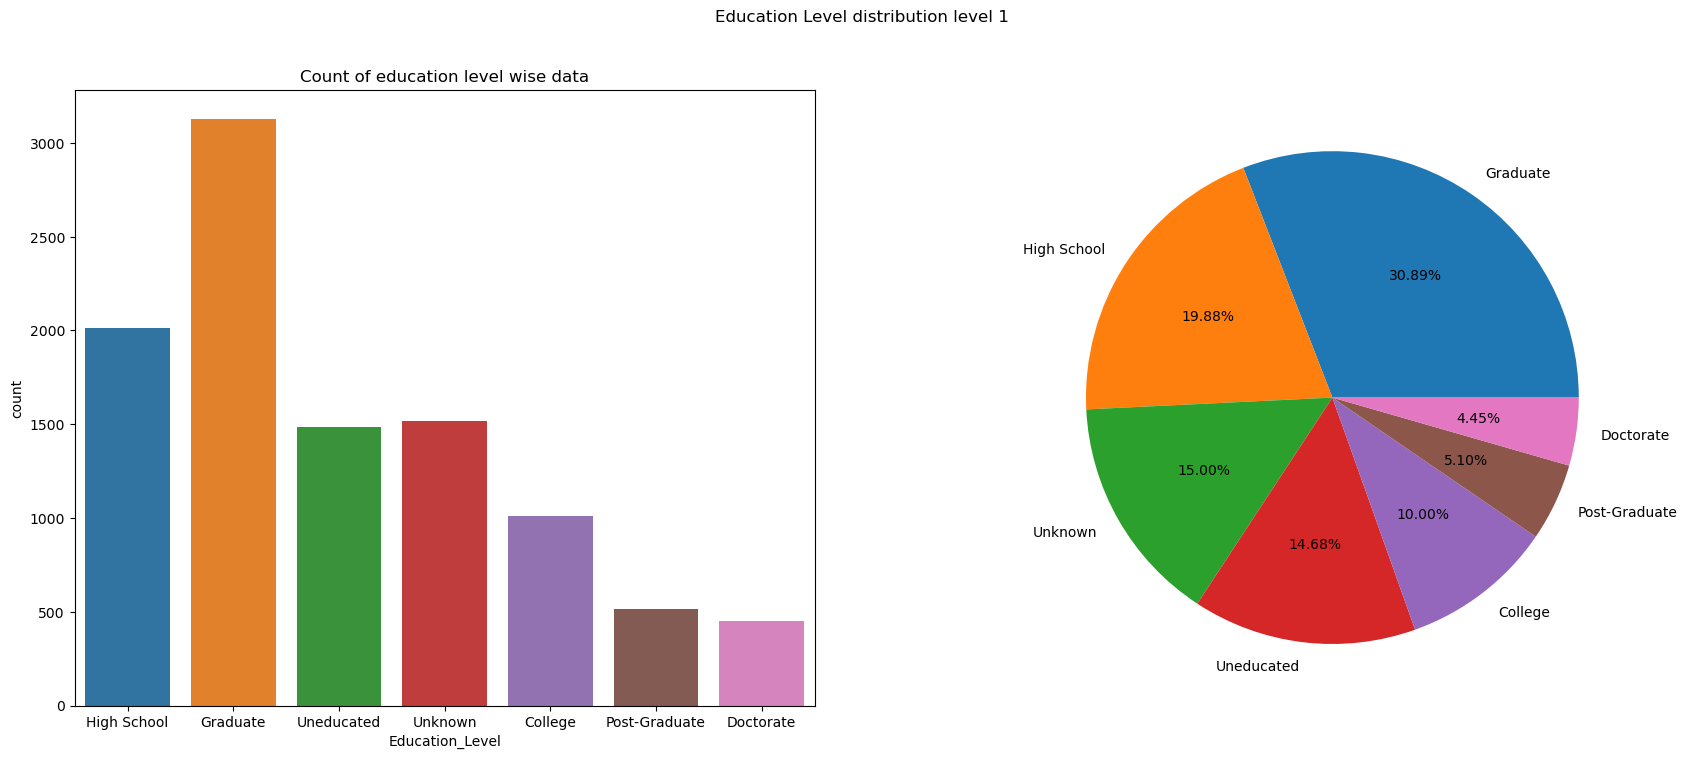

In [30]:
fig, ax=plt.subplots(1,2, figsize=(21,8))
ax[0].set_title('Count of education level wise data')
sns.countplot(x= df2['Education_Level'],ax=ax[0])
plt.pie(education_level, labels=education_level.index, autopct='%0.2f%%')
plt.suptitle('Education Level distribution level 1')
plt.show()

#### Interpretation Education Level :
##### Education level of 14.68 % customers is Uneducated
##### Education level of 19.88 % customers is high school
##### Education level of 10.00 % customers is College
##### Education level of 30.89 % customers is Graduate
##### Education level of 5.10 % customers is Post-graduate
##### Education level of 4.45 % customers is Doctorate
##### Education level of 15.00 % customers is not known

## Marital status level 1 Analysis

In [31]:
marital_status=df2['Marital_Status'].value_counts()
marital_status

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

In [32]:
df2.Marital_Status.isnull().sum()

0

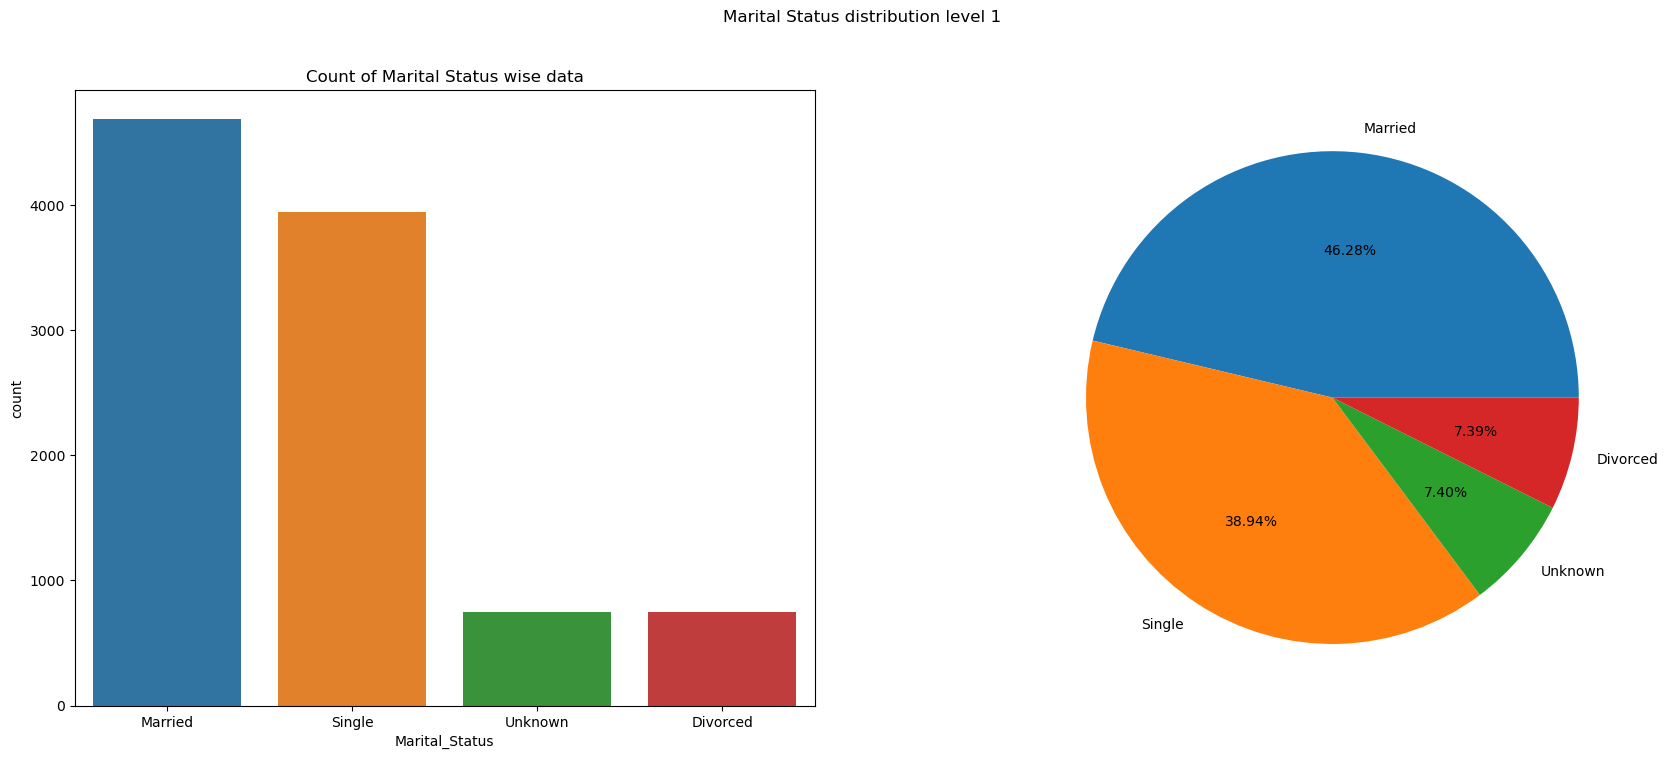

In [33]:
fig, ax=plt.subplots(1,2, figsize=(21,8))
ax[0].set_title('Count of Marital Status wise data')
sns.countplot(x= df2['Marital_Status'],ax=ax[0])
plt.pie(marital_status, labels=marital_status.index, autopct='%0.2f%%')
plt.suptitle('Marital Status distribution level 1')
plt.show()

#### Interpretation Marital status :
##### 46.28 % of customers are single
##### 38.94 % of customers are single
##### 7.39 % of customers are single
##### 7.40 % of customers realtionship status is unknown

### Income Category Level 1 Analysis

In [34]:
income_category=df2['Income_Category'].value_counts()
income_category

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

In [35]:
df2.Income_Category.isnull().sum()

0

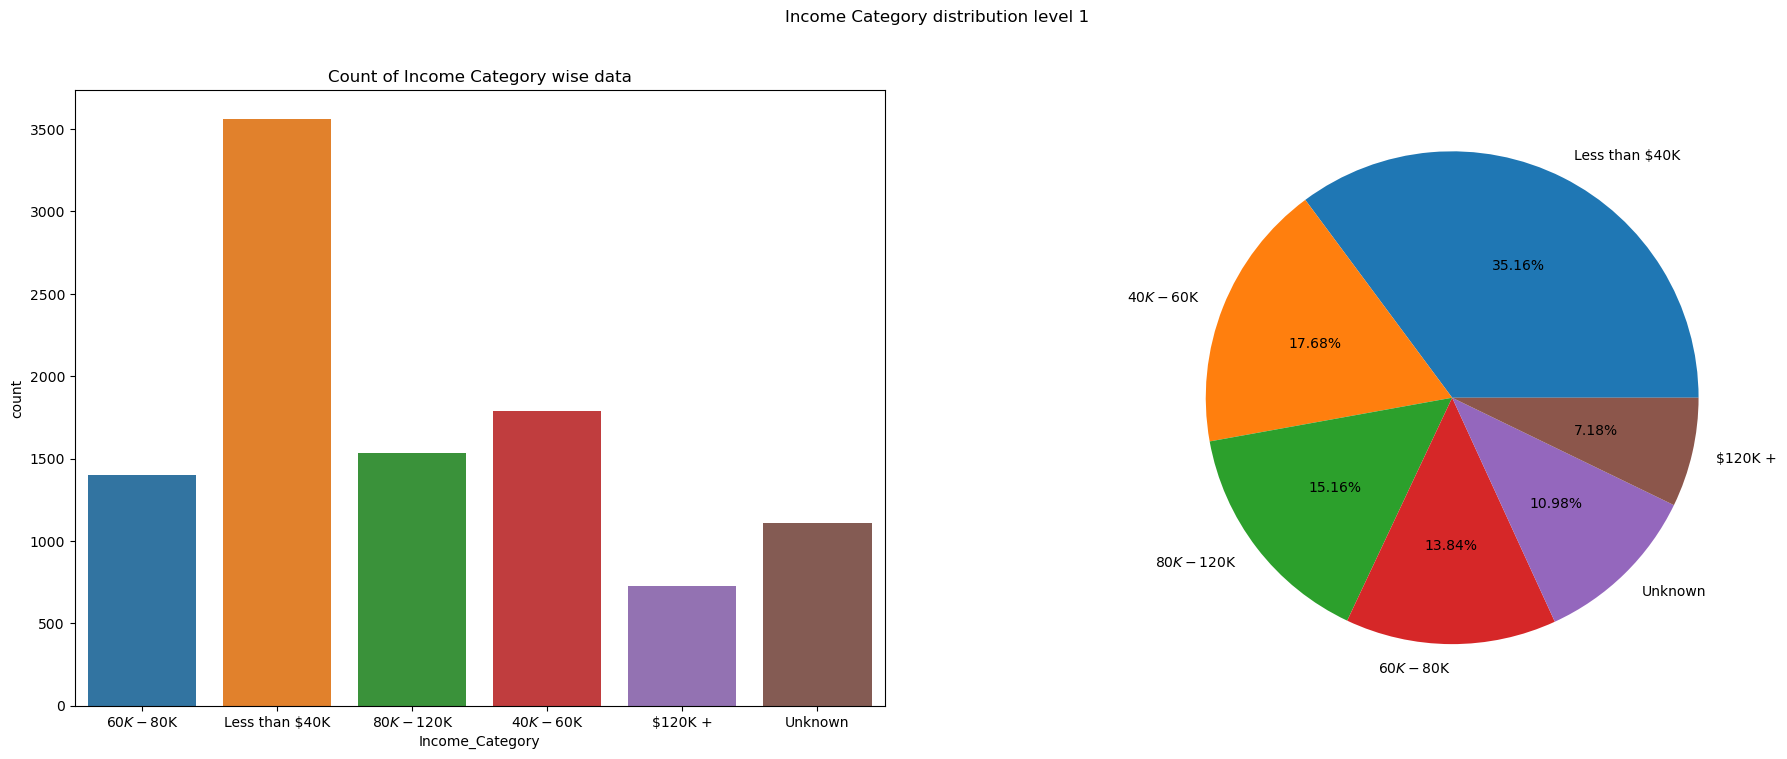

In [36]:
fig, ax=plt.subplots(1,2, figsize=(23,8))
ax[0].set_title('Count of Income Category wise data')
sns.countplot(x= df2['Income_Category'],ax=ax[0])
plt.pie(income_category, labels=income_category.index, autopct='%0.2f%%')
plt.suptitle('Income Category distribution level 1')
plt.show()

#### Interpretation Income Category : (Below income is in $ )
##### 35.16 % customers have less than 40K income
##### 17.68 % customers have 40K-60K income
##### 13.84 % customers have 60K-80K income
##### 15.16 % customers have 80K-120K income'
##### 7.18 % customers have 120K+ income
##### 10.98 % customers income is not known

### Card category level 1 Analysis

In [37]:
car_category=df2['Card_Category'].value_counts()
car_category

Card_Category
Blue        9315
Silver       544
Gold         116
Platinum      20
Name: count, dtype: int64

In [38]:
df2.Card_Category.isnull().sum()

132

In [39]:
df2.Card_Category.mode()[0]

'Blue'

In [40]:
df2.Card_Category.fillna(df2.Card_Category.mode()[0], inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_11524\3758750244.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2.Card_Category.fillna(df2.Card_Category.mode()[0], inplace=True)


In [41]:
df2.Card_Category.isnull().sum()

0

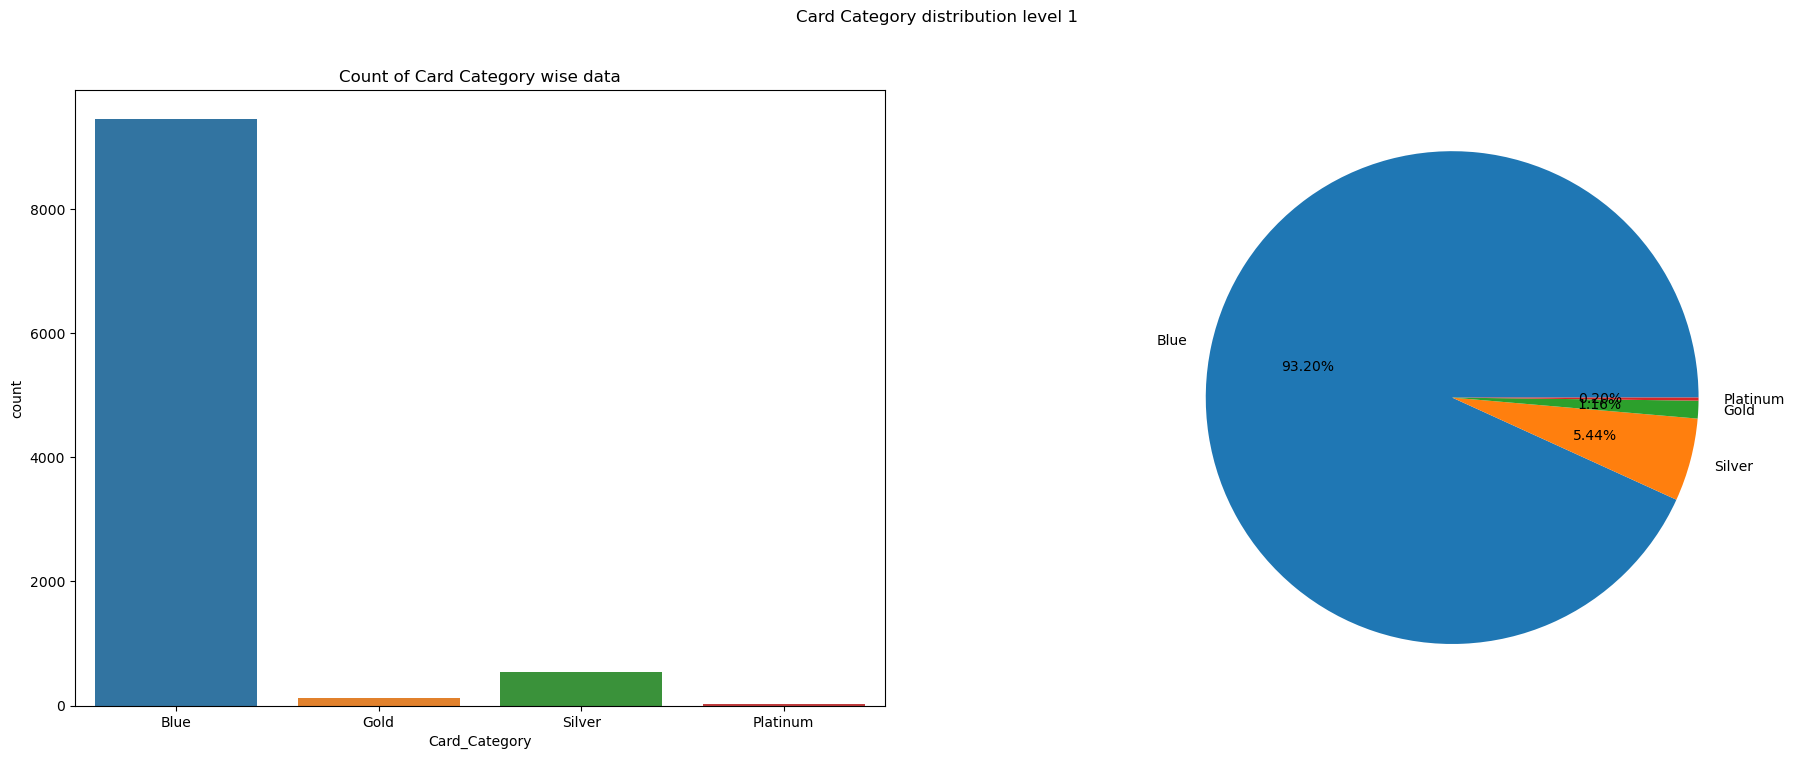

In [42]:
fig, ax=plt.subplots(1,2, figsize=(23,8))
ax[0].set_title('Count of Card Category wise data')
sns.countplot(x= df2['Card_Category'],ax=ax[0])
plt.pie(car_category, labels=car_category.index, autopct='%0.2f%%')
plt.suptitle('Card Category distribution level 1')
plt.show()

#### Interpretation Card Category :
##### 0.20 % customers belong to Platinum card category
##### 1.16 % customers belong to gold card category
##### 5.44 % customers belong to silver card category
##### 93.23 % customers belong to blue card category

### Month on books level 1 Analysis

In [43]:
df2['Months_on_book'].mode()

0    36
Name: Months_on_book, dtype: int64

In [44]:
months_on_books=df2['Months_on_book'].value_counts()
months_on_books

Months_on_book
36    2463
37     358
34     353
38     347
39     341
40     333
31     318
35     317
33     305
30     300
41     297
32     289
28     275
43     273
42     271
29     241
44     230
45     227
27     206
46     197
26     186
47     171
25     165
48     162
24     160
49     141
23     116
22     105
56     103
50      96
21      83
51      80
53      78
20      74
13      70
19      63
52      62
18      58
54      53
55      42
17      39
15      34
16      29
14      16
Name: count, dtype: int64

In [45]:
months_on_books.isnull().sum()

0

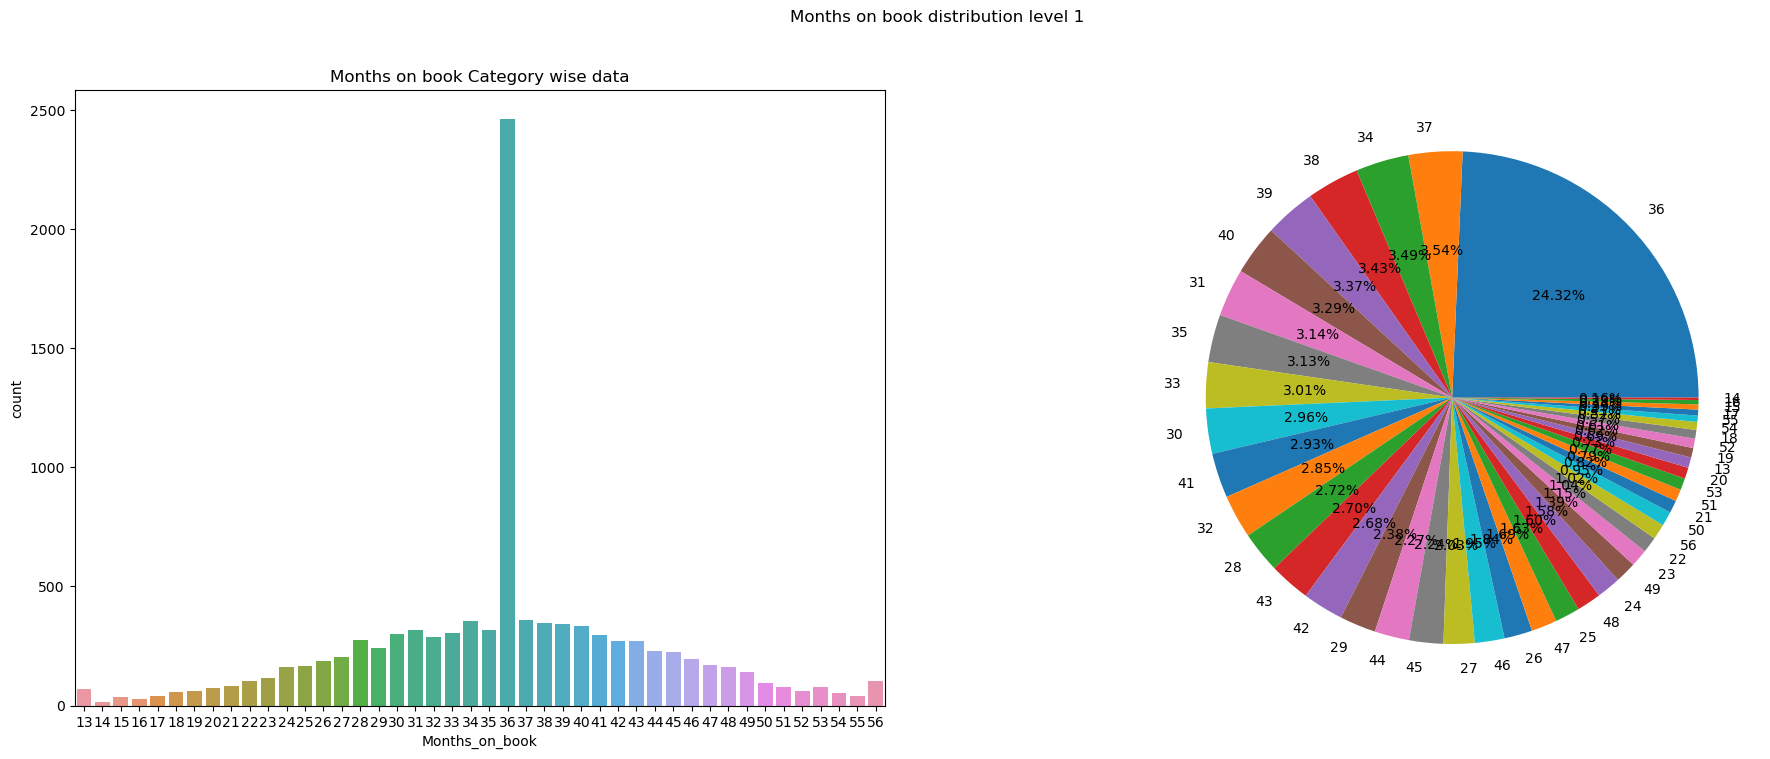

In [46]:
fig, ax=plt.subplots(1,2, figsize=(23,8))
ax[0].set_title('Months on book Category wise data')
sns.countplot(x= df2['Months_on_book'],ax=ax[0])
plt.pie(months_on_books, labels=months_on_books.index, autopct='%0.2f%%')
plt.suptitle('Months on book distribution level 1')
plt.show()

### Total Relationship Count level 1 Analysis

In [47]:
Total_Relationship_Count=df2[ 'Total_Relationship_Count'].value_counts()
Total_Relationship_Count

Total_Relationship_Count
3    2305
4    1912
5    1891
6    1866
2    1243
1     910
Name: count, dtype: int64

In [48]:
df2.Total_Relationship_Count.isnull().sum()

0

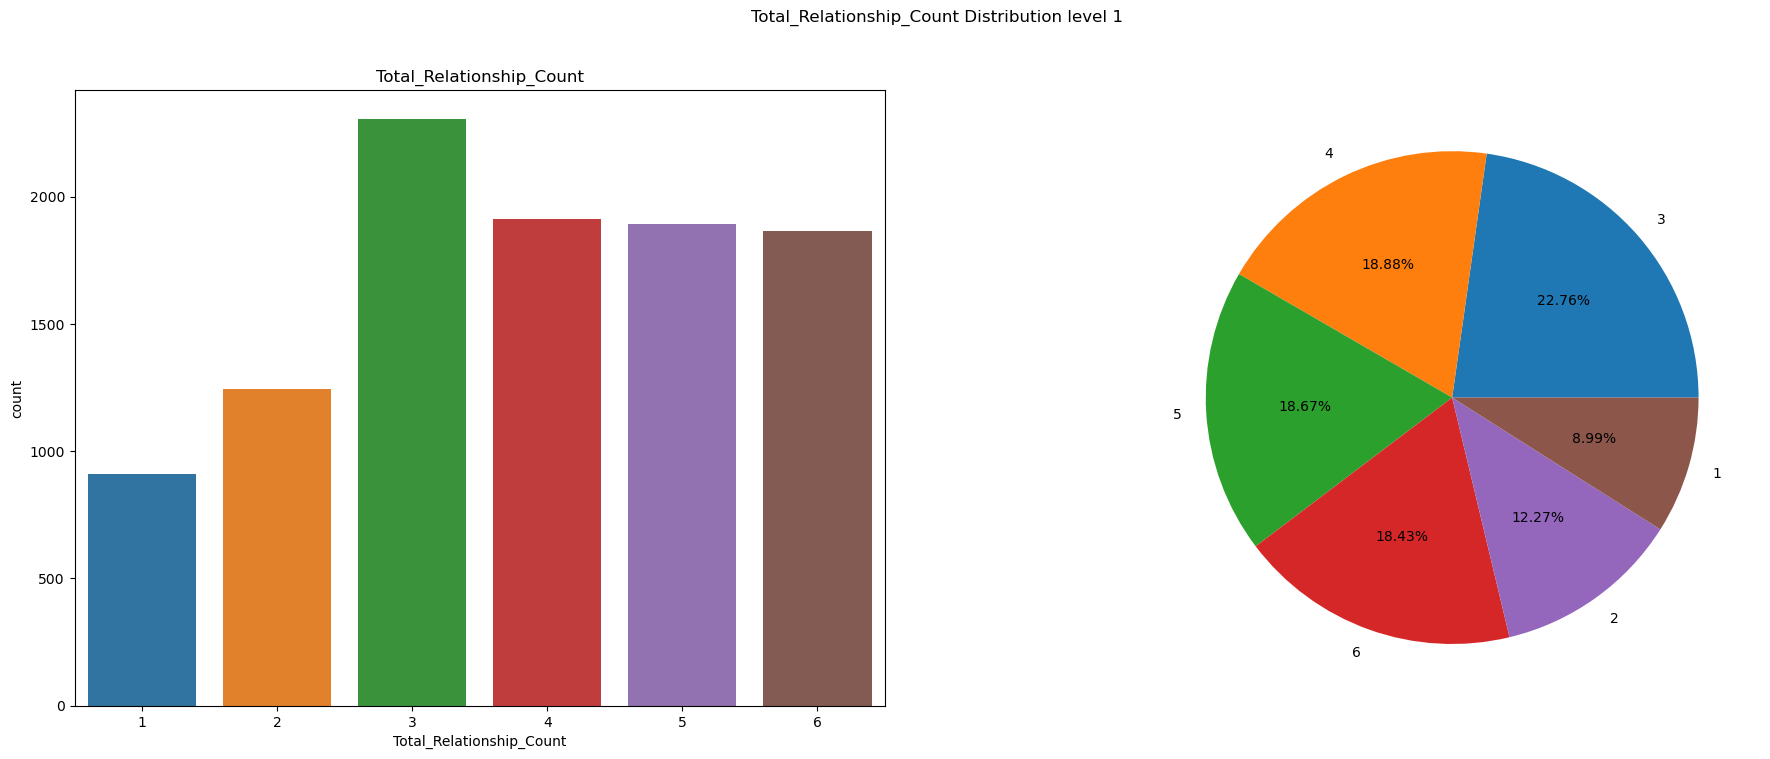

In [49]:
fig, ax= plt.subplots(1,2, figsize=(23,8))
ax[0].set_title('Total_Relationship_Count')
sns.countplot(x=df2['Total_Relationship_Count'], ax=ax[0])
plt.pie(Total_Relationship_Count, labels=Total_Relationship_Count.index, autopct='%0.2f%%')
plt.suptitle('Total_Relationship_Count Distribution level 1')
plt.show()

### Months Inactive 12 mon level 1 Analysis

In [50]:
Months_Inactive_12_mon=df2['Months_Inactive_12_mon'].value_counts()
Months_Inactive_12_mon

Months_Inactive_12_mon
3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Name: count, dtype: int64

In [51]:
df2.Months_Inactive_12_mon.isnull().sum()

0

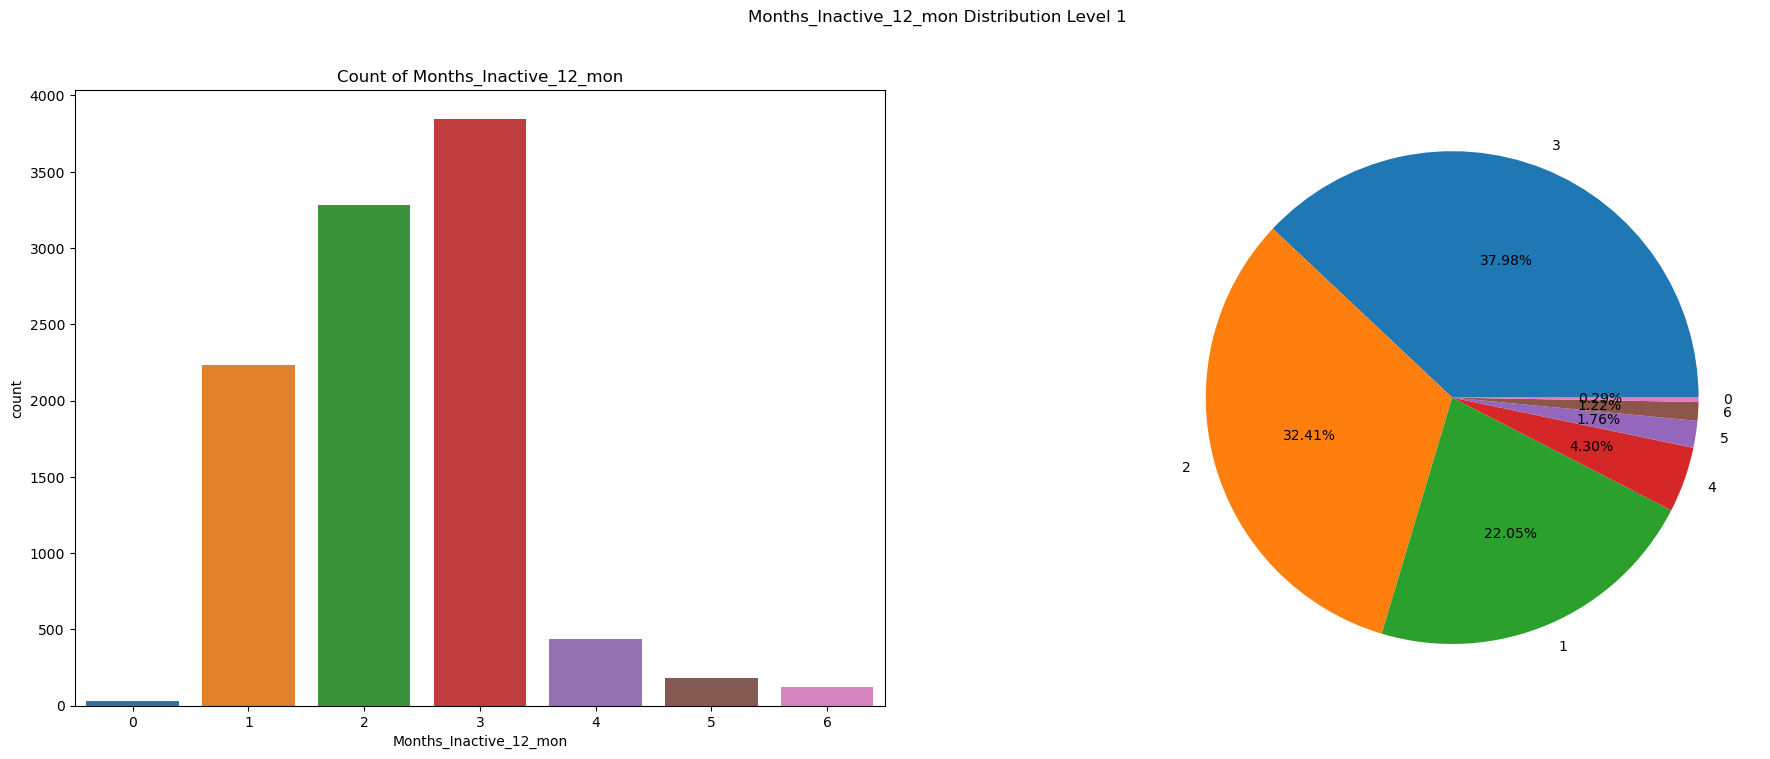

In [52]:
fig, ax=plt.subplots(1,2, figsize=(23,8))
ax[0].set_title('Count of Months_Inactive_12_mon')
sns.countplot(x=df2['Months_Inactive_12_mon'], ax=ax[0])
plt.pie(Months_Inactive_12_mon, labels=Months_Inactive_12_mon.index, autopct='%0.2f%%')
plt.suptitle('Months_Inactive_12_mon Distribution Level 1')
plt.show()

### Contacts Count 12 mon level 1 Analysis

In [53]:
Contacts_Count_12_mon=df2['Contacts_Count_12_mon'].value_counts()
Contacts_Count_12_mon

Contacts_Count_12_mon
3    3380
2    3227
1    1499
4    1392
0     399
5     176
6      54
Name: count, dtype: int64

In [54]:
df2.Contacts_Count_12_mon.isnull().sum()

0

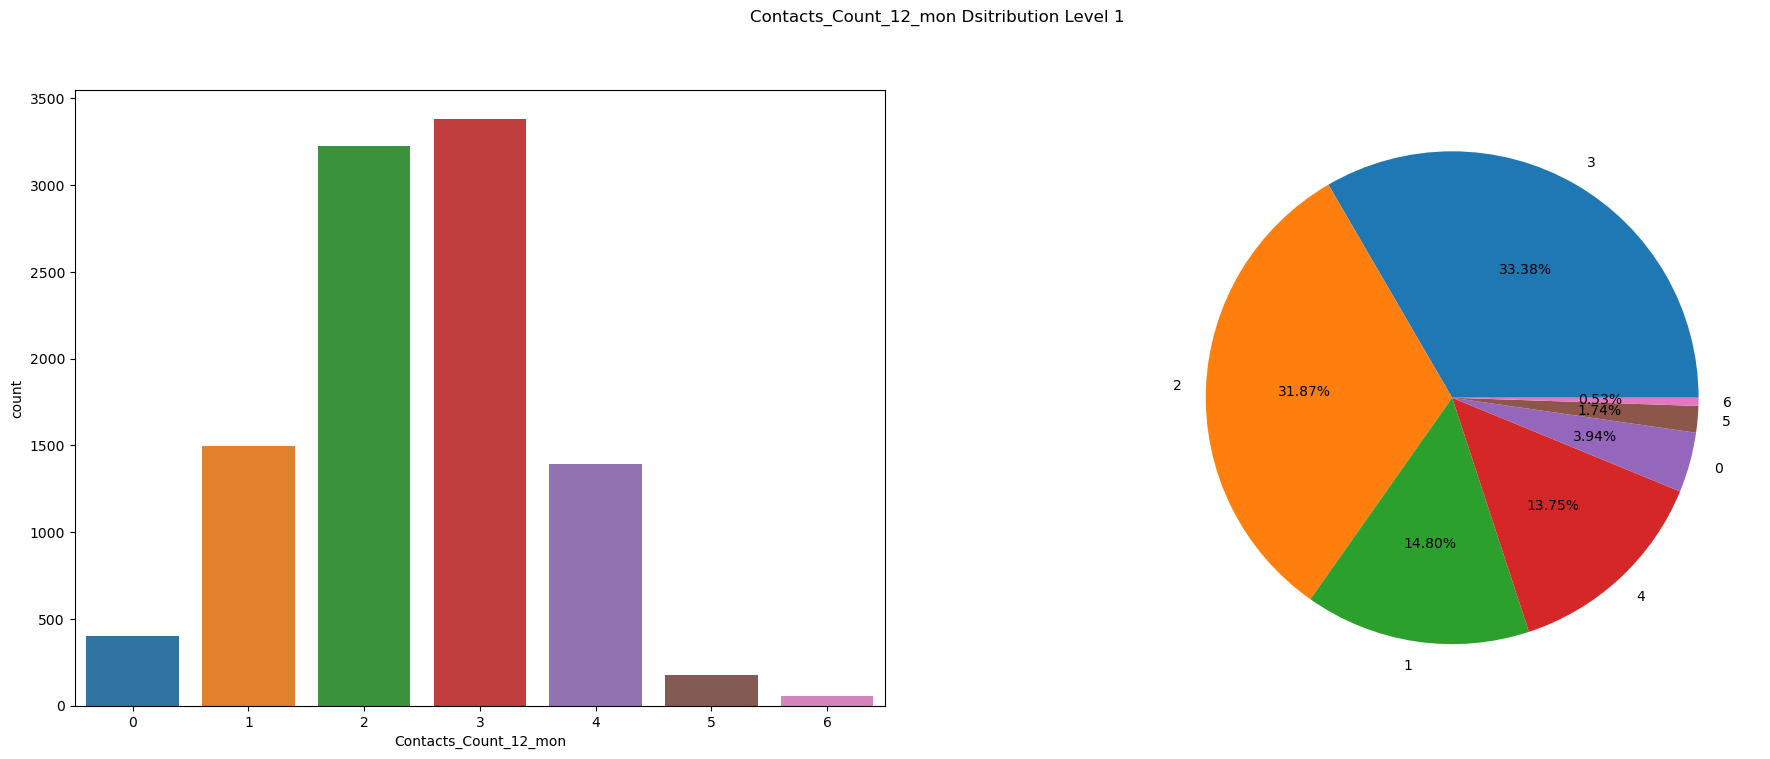

In [55]:
fig, ax=plt.subplots(1,2, figsize=(23,8))
ax[0].set_title=(' Counts of Contacts_Count_12_mon')
sns.countplot(x=df2['Contacts_Count_12_mon'], ax=ax[0])
plt.pie(Contacts_Count_12_mon, labels=Contacts_Count_12_mon.index, autopct='%0.2f%%')
plt.suptitle('Contacts_Count_12_mon Dsitribution Level 1')
plt.show()

## Numerical column Analysis

### Credit limit level 1 Analysis

In [56]:
df2['Credit_Limit']

0        12691.0
1         8256.0
2         3418.0
3         3313.0
4         4716.0
          ...   
10122     4003.0
10123     4277.0
10124     5409.0
10125     5281.0
10126    10388.0
Name: Credit_Limit, Length: 10127, dtype: float64

In [57]:
df2['Credit_Limit'].value_counts()

Credit_Limit
34516.0    505
1438.3     502
9959.0      18
15987.0     18
23981.0     12
          ... 
12856.0      1
10467.0      1
32866.0      1
21425.0      1
10388.0      1
Name: count, Length: 6181, dtype: int64

In [58]:
df2['Credit_Limit'].isnull().sum()

60

In [59]:
df2['Credit_Limit'].fillna(df2['Credit_Limit'].mean(), inplace=True)

In [60]:
df2['Credit_Limit'].isnull().sum()

0

In [61]:
avg=df2['Credit_Limit'].mean()
median=df2['Credit_Limit'].median()
mode=df2['Credit_Limit'].mode()
var=df2['Credit_Limit'].var()
std=df2['Credit_Limit'].std()
maximum=df2['Credit_Limit'].max()
minimum=df2['Credit_Limit'].min()
range_credit=maximum-minimum
total_credit=df2['Credit_Limit'].sum()

In [62]:
print('Mean is ', avg)
print('Median is ', median)
print('Mode is ', mode)
print('Variance is ', var)
print('std is ', std)
print('Maximum is ', maximum)
print('Minimum is ', minimum)
print('Range is ', range_credit)
print('Total credit is ', total_credit)

Mean is  8703.180550312904
Median is  4597.0
Mode is  0    34516.0
Name: Credit_Limit, dtype: float64
Variance is  83956745.0391082
std is  9162.791334473803
Maximum is  34664.0
Minimum is  1438.3
Range is  33225.7
Total credit is  88137109.43301877


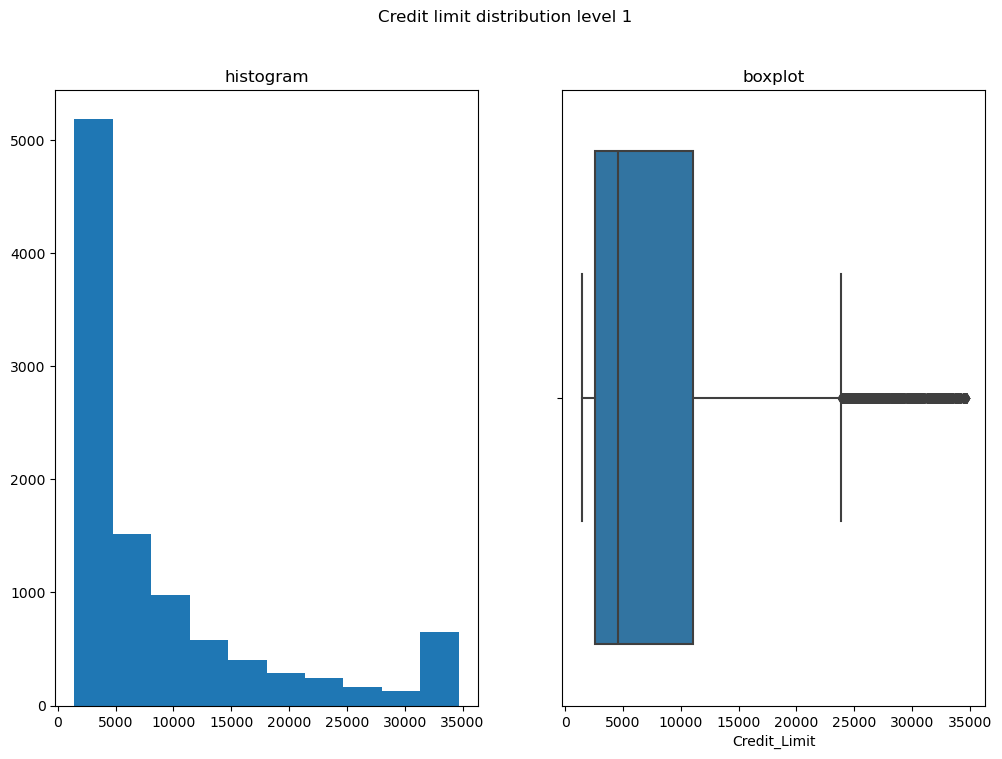

In [63]:
fig, ax=plt.subplots(1,2, figsize=(12,8))
ax[0].set_title('histogram')
ax[0].hist(df2['Credit_Limit'])
ax[1].set_title('boxplot')
sns.boxplot(data=df2, x= 'Credit_Limit',ax=ax[1])
plt.suptitle('Credit limit distribution level 1')
plt.show()

In [64]:
q1= df2['Credit_Limit'].quantile(0.25)
q3= df2['Credit_Limit'].quantile(0.75)
iqr= q3-q1
lf= q1-1.5*iqr
uf= q3+1.5*iqr

In [65]:
med= df2['Credit_Limit'].median()

In [66]:
print(lf,uf,med)

-10214.75 23859.25 4597.0


In [67]:
condition = (df2['Credit_Limit']<lf) | (df2['Credit_Limit']>uf )
df2.loc[condition, 'Credit_Limit'] = med

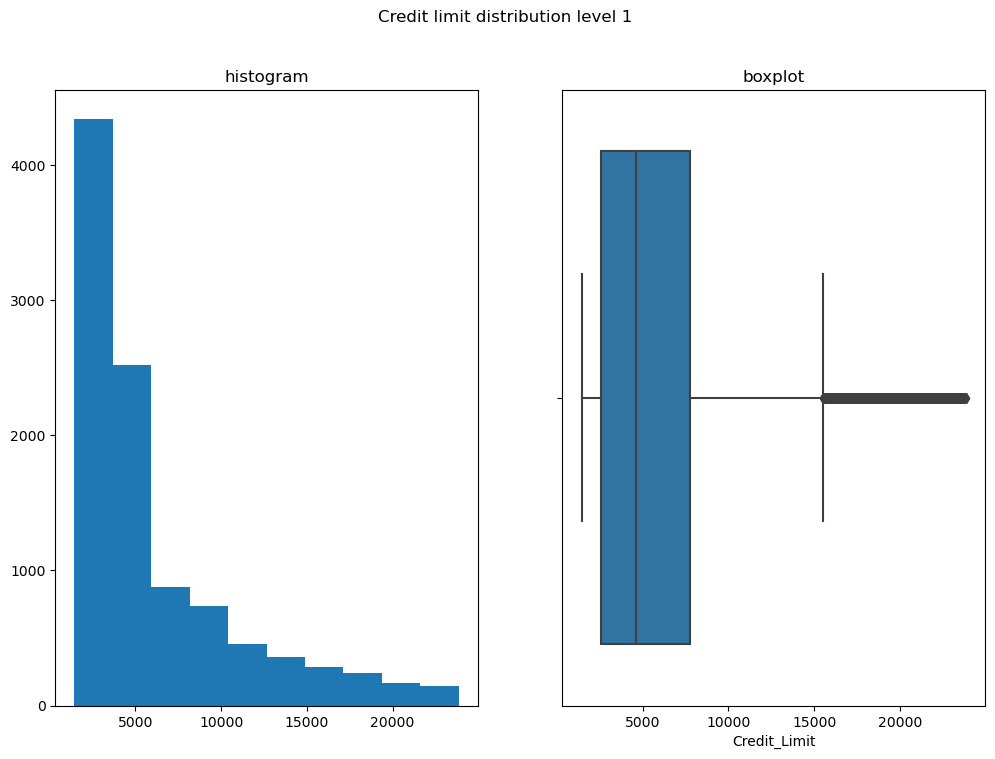

In [68]:
fig, ax=plt.subplots(1,2, figsize=(12,8))
ax[0].set_title('histogram')
ax[0].hist(df2['Credit_Limit'])
ax[1].set_title('boxplot')
sns.boxplot(data=df2, x= 'Credit_Limit',ax=ax[1])
plt.suptitle('Credit limit distribution level 1')
plt.show()

### CLIENTNUM Level 1 Analysis

In [69]:
CLIENTNUM=df2['CLIENTNUM']
CLIENTNUM

0        768805383
1        818770008
2        713982108
3        769911858
4        709106358
           ...    
10122    772366833
10123    710638233
10124    716506083
10125    717406983
10126    714337233
Name: CLIENTNUM, Length: 10127, dtype: int64

In [70]:
CLIENTNUM=df2['CLIENTNUM'].value_counts()
CLIENTNUM

CLIENTNUM
768805383    1
711784908    1
720133908    1
803197833    1
812222208    1
            ..
796903083    1
716014983    1
712521783    1
780045708    1
714337233    1
Name: count, Length: 10127, dtype: int64

In [71]:
df2.CLIENTNUM.isnull().sum()

0

In [72]:
avg=df2['CLIENTNUM'].mean()
median=df2['CLIENTNUM'].median()
mode=df2['CLIENTNUM'].mode()
var=df2['CLIENTNUM'].var()
std=df2['CLIENTNUM'].std()
maximum=df2['CLIENTNUM'].max()
minimum=df2['CLIENTNUM'].min()
range_credit=maximum-minimum
total_credit=df2['CLIENTNUM'].sum()

In [73]:
print('Mean is ', avg)
print('Median is ', median)
print('Mode is ', mode[0])
print('Variance is ', var)
print('std is ', std)
print('Maximum is ', maximum)
print('Minimum is ', minimum)
print('Range is ', range_credit)
print('Total credit is ', total_credit)

Mean is  739177606.3336625
Median is  717926358.0
Mode is  708082083
Variance is  1361889232941551.5
std is  36903783.45023111
Maximum is  828343083
Minimum is  708082083
Range is  120261000
Total credit is  7485651619341


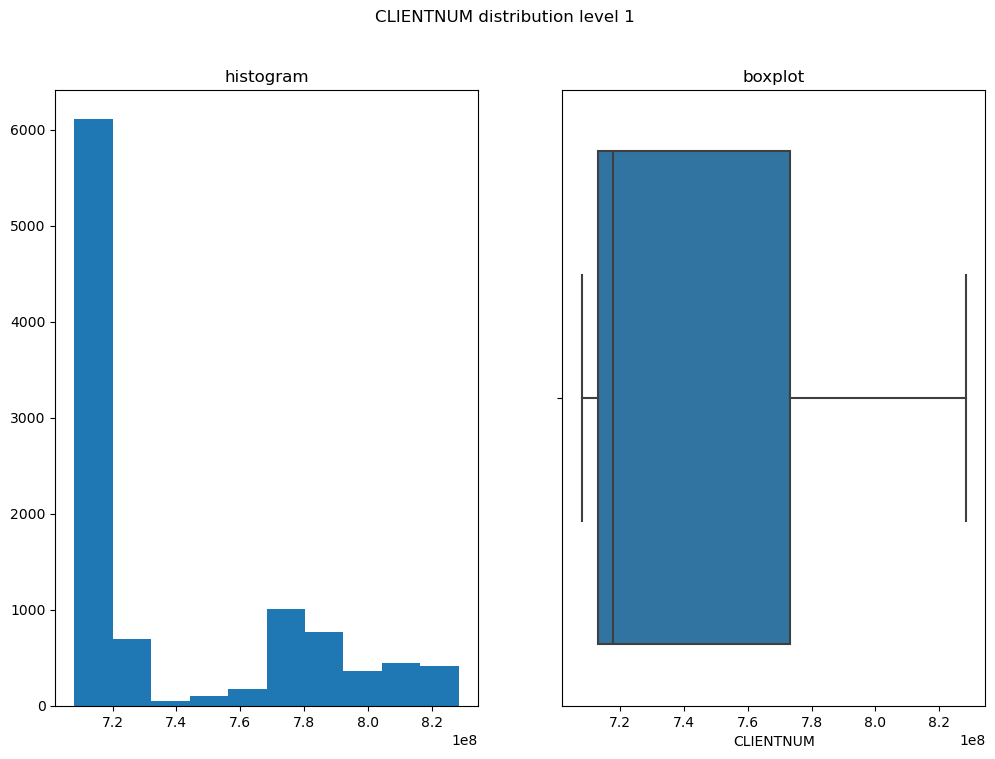

In [74]:
fig, ax=plt.subplots(1,2, figsize=(12,8))
ax[0].set_title('histogram')
ax[0].hist(df2['CLIENTNUM'])
ax[1].set_title('boxplot')
sns.boxplot(data=df2, x= 'CLIENTNUM',ax=ax[1])
plt.suptitle('CLIENTNUM distribution level 1')
plt.show()

### Customer Age Level 1 Analysis

In [75]:
Customer_Age=df2['Customer_Age']
Customer_Age

0        45
1        49
2        51
3        40
4        40
         ..
10122    50
10123    41
10124    44
10125    30
10126    43
Name: Customer_Age, Length: 10127, dtype: int64

In [76]:
Customer_Age=df2['Customer_Age'].value_counts()
Customer_Age

Customer_Age
44     498
49     490
46     489
45     481
47     472
      ... 
167      1
78       1
116      1
219      1
145      1
Name: count, Length: 122, dtype: int64

In [77]:
df2.Customer_Age.isnull().sum()

0

In [78]:
avg=df2['Customer_Age'].mean()
median=df2['Customer_Age'].median()
mode=df2['Customer_Age'].mode()
var=df2['Customer_Age'].var()
std=df2['Customer_Age'].std()
maximum=df2['Customer_Age'].max()
minimum=df2['Customer_Age'].min()
range_credit=maximum-minimum
total_credit=df2['Customer_Age'].sum()

In [79]:
print('Mean is ', avg)
print('Median is ', median)
print('Mode is ', mode)
print('Variance is ', var)
print('std is ', std)
print('Maximum is ', maximum)
print('Minimum is ', minimum)
print('Range is ', range_credit)
print('Total credit is ', total_credit)

Mean is  47.285276982324476
Median is  46.0
Mode is  0    44
Name: Customer_Age, dtype: int64
Variance is  176.11740418704878
std is  13.270923260536502
Maximum is  222
Minimum is  26
Range is  196
Total credit is  478858


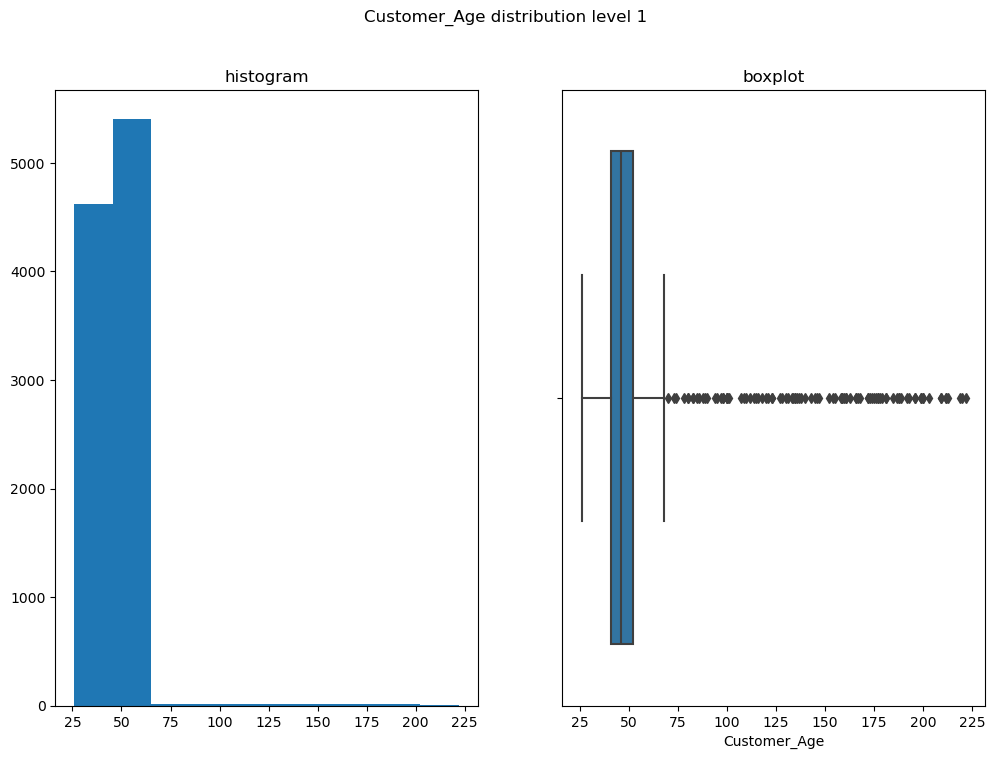

In [80]:
fig, ax=plt.subplots(1,2, figsize=(12,8))
ax[0].set_title('histogram')
ax[0].hist(df2['Customer_Age'])
ax[1].set_title('boxplot')
sns.boxplot(data=df2, x= 'Customer_Age',ax=ax[1])
plt.suptitle('Customer_Age distribution level 1')
plt.show()

In [81]:
q1= df2['Customer_Age'].quantile(0.25)
q3= df2['Customer_Age'].quantile(0.75)
iqr= q3-q1
lf= q1-1.5*iqr
uf= q3+1.5*iqr
med= df2['Customer_Age'].median()
print(lf,uf,med)

24.5 68.5 46.0


In [82]:
condition = (df2['Customer_Age']<lf) | (df2['Customer_Age']>uf )
df2.loc[condition, 'Customer_Age'] = med

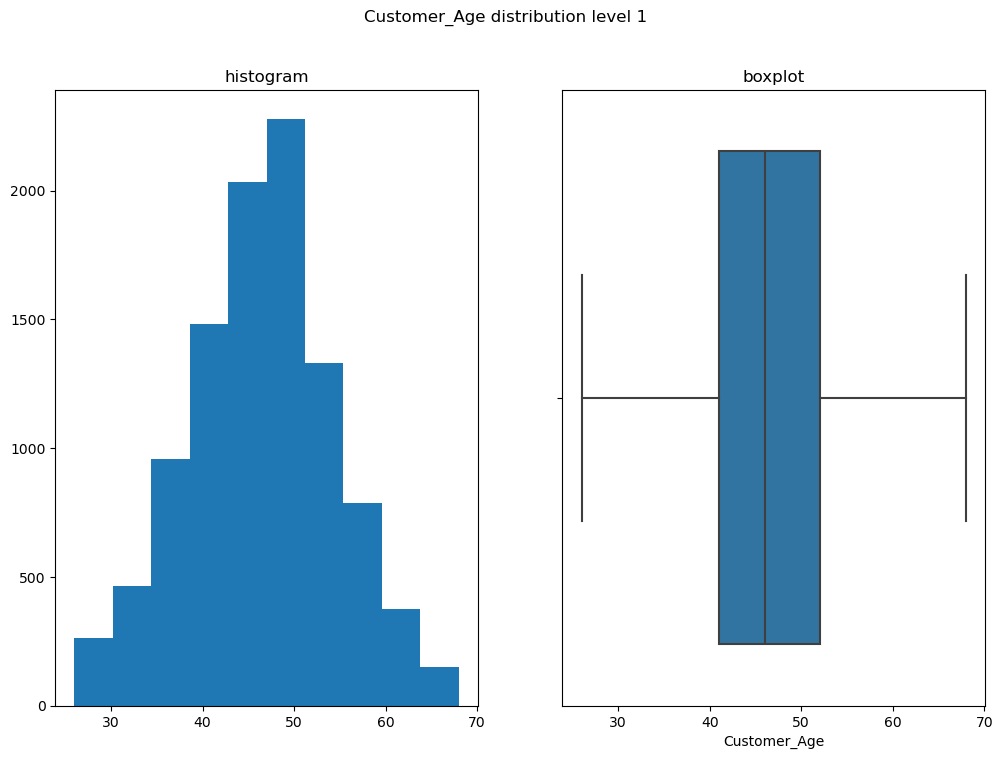

In [83]:
fig, ax=plt.subplots(1,2, figsize=(12,8))
ax[0].set_title('histogram')
ax[0].hist(df2['Customer_Age'])
ax[1].set_title('boxplot')
sns.boxplot(data=df2, x= 'Customer_Age',ax=ax[1])
plt.suptitle('Customer_Age distribution level 1')
plt.show()

### Total Revolving Bal Level 1 Analysis

In [84]:
Total_Revolving_Bal=df2['Total_Revolving_Bal']
Total_Revolving_Bal

0         777
1         864
2           0
3        2517
4           0
         ... 
10122    1851
10123    2186
10124       0
10125       0
10126    1961
Name: Total_Revolving_Bal, Length: 10127, dtype: int64

In [85]:
Total_Revolving_Bal=df2['Total_Revolving_Bal'].value_counts()
Total_Revolving_Bal

Total_Revolving_Bal
0       2470
2517     508
1965      12
1480      12
1434      11
        ... 
2467       1
2131       1
2400       1
2144       1
2241       1
Name: count, Length: 1974, dtype: int64

In [86]:
df2.Total_Revolving_Bal.isnull().sum()

0

In [87]:
avg=df2['Total_Revolving_Bal'].mean()
median=df2['Total_Revolving_Bal'].median()
mode=df2['Total_Revolving_Bal'].mode()
var=df2['Total_Revolving_Bal'].var()
std=df2['Total_Revolving_Bal'].std()
maximum=df2['Total_Revolving_Bal'].max()
minimum=df2['Total_Revolving_Bal'].min()
range_credit=maximum-minimum
total_credit=df2['Total_Revolving_Bal'].sum()

In [88]:
print('Mean is ', avg)
print('Median is ', median)
print('Mode is ', mode)
print('Variance is ', var)
print('std is ', std)
print('Maximum is ', maximum)
print('Minimum is ', minimum)
print('Range is ', range_credit)
print('Total credit is ', total_credit)

Mean is  1162.8140614199665
Median is  1276.0
Mode is  0    0
Name: Total_Revolving_Bal, dtype: int64
Variance is  664204.356594701
std is  814.9873352357697
Maximum is  2517
Minimum is  0
Range is  2517
Total credit is  11775818


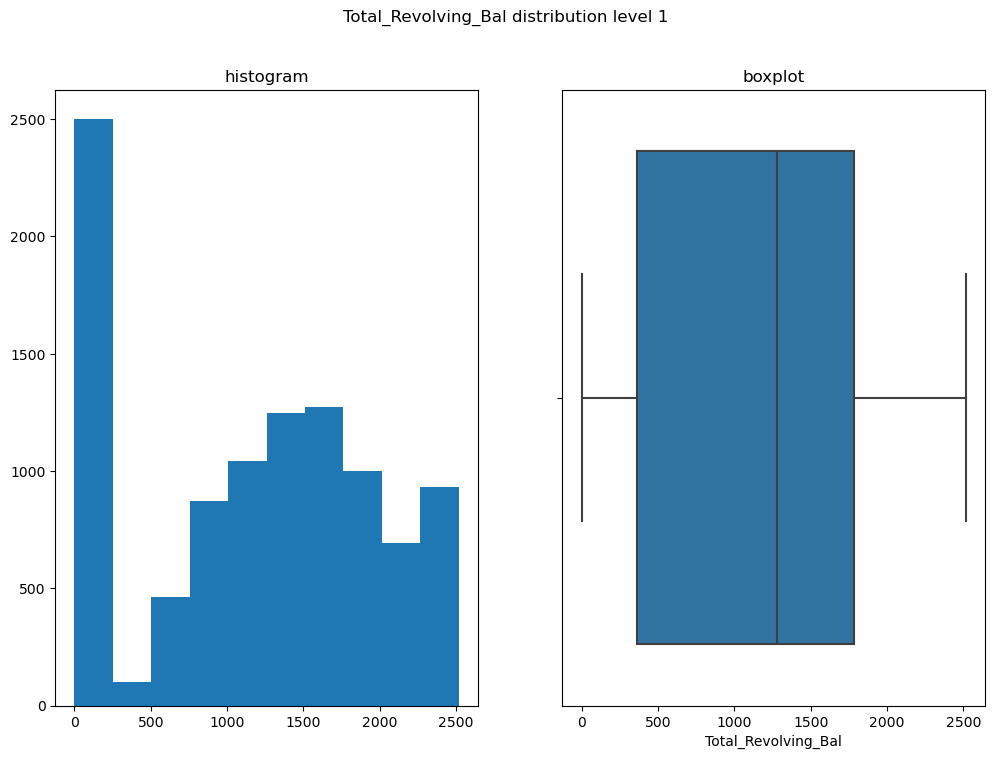

In [89]:
fig, ax=plt.subplots(1,2, figsize=(12,8))
ax[0].set_title('histogram')
ax[0].hist(df2['Total_Revolving_Bal'])
ax[1].set_title('boxplot')
sns.boxplot(data=df2, x= 'Total_Revolving_Bal',ax=ax[1])
plt.suptitle('Total_Revolving_Bal distribution level 1')
plt.show()

### Avg Open To Buy Level 1 Analysis

In [90]:
Avg_Open_To_Buy=df2['Avg_Open_To_Buy']
Avg_Open_To_Buy

0        11914.0
1         7392.0
2         3418.0
3          796.0
4         4716.0
          ...   
10122     2152.0
10123     2091.0
10124     5409.0
10125     5281.0
10126     8427.0
Name: Avg_Open_To_Buy, Length: 10127, dtype: float64

In [91]:
Avg_Open_To_Buy=df2['Avg_Open_To_Buy'].value_counts()
Avg_Open_To_Buy

Avg_Open_To_Buy
1438.3     324
34516.0     98
31999.0     26
787.0        8
701.0        7
          ... 
6543.0       1
2808.0       1
21549.0      1
6189.0       1
8427.0       1
Name: count, Length: 6813, dtype: int64

In [92]:
df2.Avg_Open_To_Buy.isnull().sum()

0

In [93]:
avg=df2['Avg_Open_To_Buy'].mean()
median=df2['Avg_Open_To_Buy'].median()
mode=df2['Avg_Open_To_Buy'].mode()
var=df2['Avg_Open_To_Buy'].var()
std=df2['Avg_Open_To_Buy'].std()
maximum=df2['Avg_Open_To_Buy'].max()
minimum=df2['Avg_Open_To_Buy'].min()
range_credit=maximum-minimum
total_credit=df2['Avg_Open_To_Buy'].sum()

In [94]:
print('Mean is ', avg)
print('Median is ', median)
print('Mode is ', mode)
print('Variance is ', var)
print('std is ', std)
print('Maximum is ', maximum)
print('Minimum is ', minimum)
print('Range is ', range_credit)
print('Total credit is ', total_credit)

Mean is  7469.139636614989
Median is  3474.0
Mode is  0    1438.3
Name: Avg_Open_To_Buy, dtype: float64
Variance is  82640559.6541551
std is  9090.685323679128
Maximum is  34516.0
Minimum is  3.0
Range is  34513.0
Total credit is  75639977.1


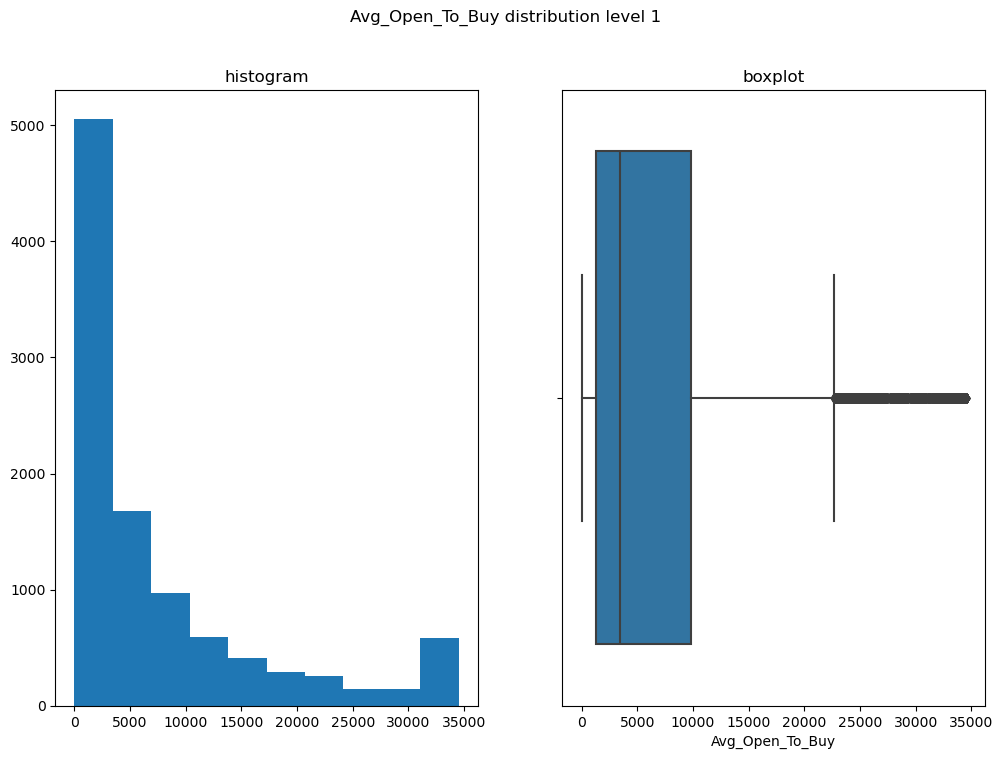

In [95]:
fig, ax=plt.subplots(1,2, figsize=(12,8))
ax[0].set_title('histogram')
ax[0].hist(df2['Avg_Open_To_Buy'])
ax[1].set_title('boxplot')
sns.boxplot(data=df2, x= 'Avg_Open_To_Buy',ax=ax[1])
plt.suptitle('Avg_Open_To_Buy distribution level 1')
plt.show()

In [96]:
q1= df2['Avg_Open_To_Buy'].quantile(0.25)
q3= df2['Avg_Open_To_Buy'].quantile(0.75)
iqr= q3-q1
lf= q1-1.5*iqr
uf= q3+1.5*iqr
med= df2['Avg_Open_To_Buy'].median()
print(lf,uf,med)

-11477.25 22660.75 3474.0


In [97]:
condition = (df2['Avg_Open_To_Buy']<lf) | (df2['Avg_Open_To_Buy']>uf )
df2.loc[condition, 'Avg_Open_To_Buy'] = med

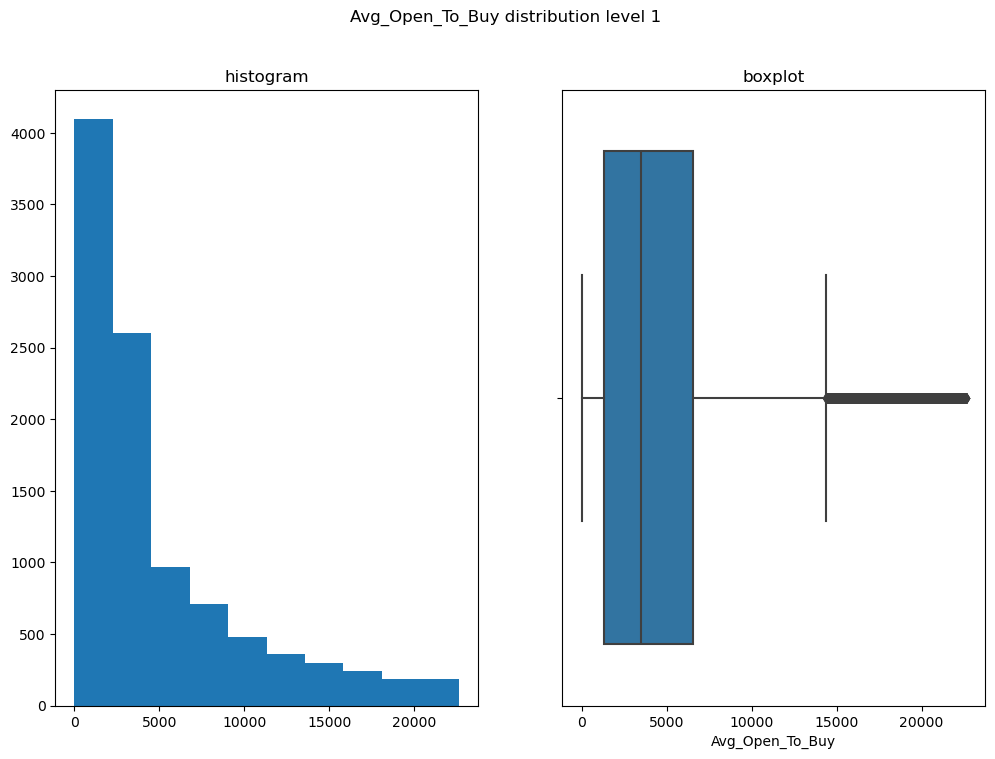

In [98]:
fig, ax=plt.subplots(1,2, figsize=(12,8))
ax[0].set_title('histogram')
ax[0].hist(df2['Avg_Open_To_Buy'])
ax[1].set_title('boxplot')
sns.boxplot(data=df2, x= 'Avg_Open_To_Buy',ax=ax[1])
plt.suptitle('Avg_Open_To_Buy distribution level 1')
plt.show()

### Total Trans Amt Level 1 Analysis

In [99]:
Total_Trans_Amt=df2['Total_Trans_Amt']
Total_Trans_Amt

0         1144
1         1291
2         1887
3         1171
4          816
         ...  
10122    15476
10123     8764
10124    10291
10125     8395
10126    10294
Name: Total_Trans_Amt, Length: 10127, dtype: int64

In [100]:
Total_Trans_Amt=df2['Total_Trans_Amt'].value_counts()
Total_Trans_Amt

Total_Trans_Amt
4253     11
4509     11
4518     10
2229     10
4220      9
         ..
1274      1
4521      1
3231      1
4394      1
10294     1
Name: count, Length: 5033, dtype: int64

In [101]:
df2.Total_Trans_Amt.isnull().sum()

0

In [102]:
avg=df2['Total_Trans_Amt'].mean()
median=df2['Total_Trans_Amt'].median()
mode=df2['Total_Trans_Amt'].mode()
var=df2['Total_Trans_Amt'].var()
std=df2['Total_Trans_Amt'].std()
maximum=df2['Total_Trans_Amt'].max()
minimum=df2['Total_Trans_Amt'].min()
range_credit=maximum-minimum
total_credit=df2['Total_Trans_Amt'].sum()

In [103]:
print('Mean is ', avg)
print('Median is ', median)
print('Mode is ', mode)
print('Variance is ', var)
print('std is ', std)
print('Maximum is ', maximum)
print('Minimum is ', minimum)
print('Range is ', range_credit)
print('Total credit is ', total_credit)

Mean is  4404.086303939963
Median is  3899.0
Mode is  0    4253
1    4509
Name: Total_Trans_Amt, dtype: int64
Variance is  11540487.165373318
std is  3397.129253557085
Maximum is  18484
Minimum is  510
Range is  17974
Total credit is  44600182


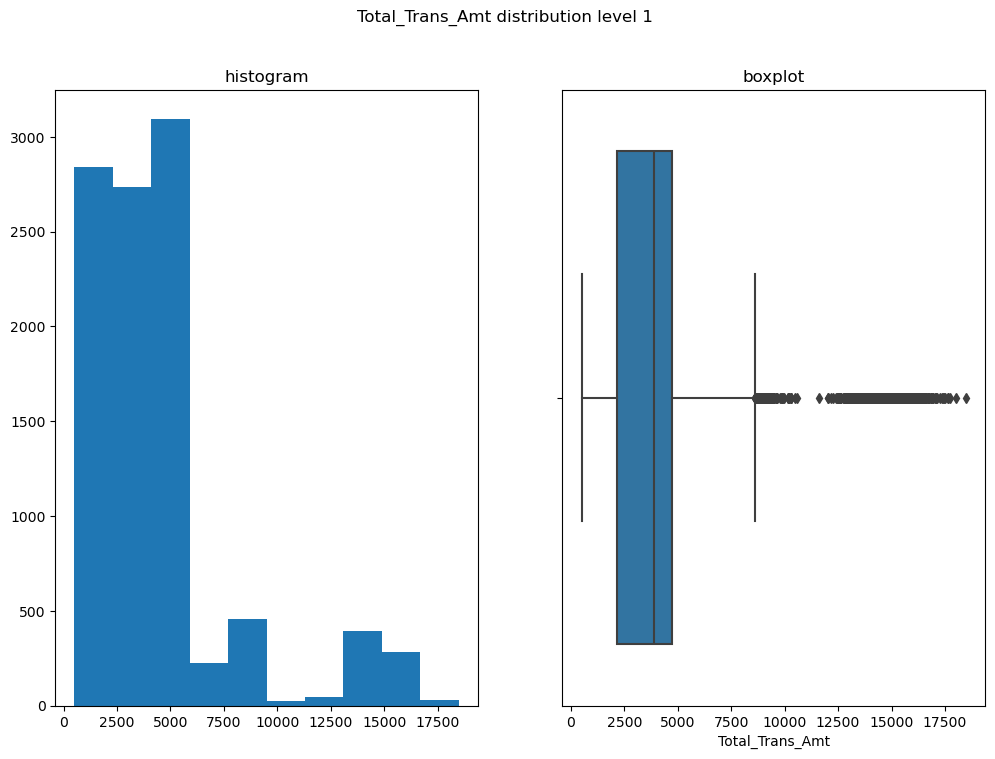

In [104]:
fig, ax=plt.subplots(1,2, figsize=(12,8))
ax[0].set_title('histogram')
ax[0].hist(df2['Total_Trans_Amt'])
ax[1].set_title('boxplot')
sns.boxplot(data=df2, x= 'Total_Trans_Amt',ax=ax[1])
plt.suptitle('Total_Trans_Amt distribution level 1')
plt.show()

In [105]:
q1= df2['Avg_Open_To_Buy'].quantile(0.25)
q3= df2['Avg_Open_To_Buy'].quantile(0.75)
iqr= q3-q1
lf= q1-1.5*iqr
uf= q3+1.5*iqr
med= df2['Avg_Open_To_Buy'].median()
print(lf,uf,med)

-6509.25 14380.75 3474.0


In [106]:
condition = (df2['Avg_Open_To_Buy']<lf) | (df2['Avg_Open_To_Buy']>uf )
df2.loc[condition, 'Avg_Open_To_Buy'] = med

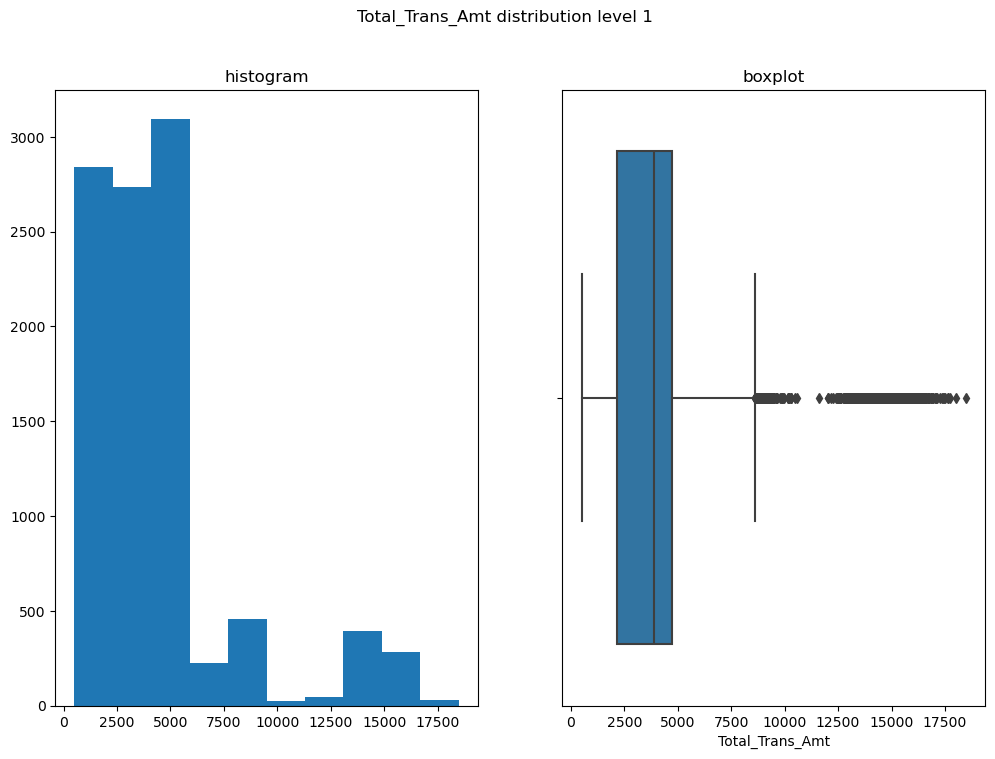

In [107]:
fig, ax=plt.subplots(1,2, figsize=(12,8))
ax[0].set_title('histogram')
ax[0].hist(df2['Total_Trans_Amt'])
ax[1].set_title('boxplot')
sns.boxplot(data=df2, x= 'Total_Trans_Amt',ax=ax[1])
plt.suptitle('Total_Trans_Amt distribution level 1')
plt.show()

### Total Trans Ct Level 1 Analysis

In [108]:
Total_Trans_Ct=df2['Total_Trans_Ct']
Total_Trans_Ct

0         42
1         33
2         20
3         20
4         28
        ... 
10122    117
10123     69
10124     60
10125     62
10126     61
Name: Total_Trans_Ct, Length: 10127, dtype: int64

In [109]:
Total_Trans_Ct=df2['Total_Trans_Ct'].value_counts()
Total_Trans_Ct

Total_Trans_Ct
81     208
71     203
75     203
69     202
82     202
      ... 
11       2
134      1
139      1
138      1
132      1
Name: count, Length: 126, dtype: int64

In [110]:
df2.Total_Trans_Ct.isnull().count()

10127

In [111]:
avg=df2['Total_Trans_Ct'].mean()
median=df2['Total_Trans_Ct'].median()
mode=df2['Total_Trans_Ct'].mode()
var=df2['Total_Trans_Ct'].var()
std=df2['Total_Trans_Ct'].std()
maximum=df2['Total_Trans_Ct'].max()
minimum=df2['Total_Trans_Ct'].min()
range_credit=maximum-minimum
total_credit=df2['Total_Trans_Ct'].sum()

In [112]:
print('Mean is ', avg)
print('Median is ', median)
print('Mode is ', mode)
print('Variance is ', var)
print('std is ', std)
print('Maximum is ', maximum)
print('Minimum is ', minimum)
print('Range is ', range_credit)
print('Total credit is ', total_credit)

Mean is  64.85869457884863
Median is  67.0
Mode is  0    81
Name: Total_Trans_Ct, dtype: int64
Variance is  550.9615634942085
std is  23.472570449233046
Maximum is  139
Minimum is  10
Range is  129
Total credit is  656824


In [113]:
df2.Total_Trans_Ct.fillna(df2['Total_Trans_Ct'].mean(), inplace=True)

In [114]:
df2.Total_Trans_Ct.isnull().sum()

0

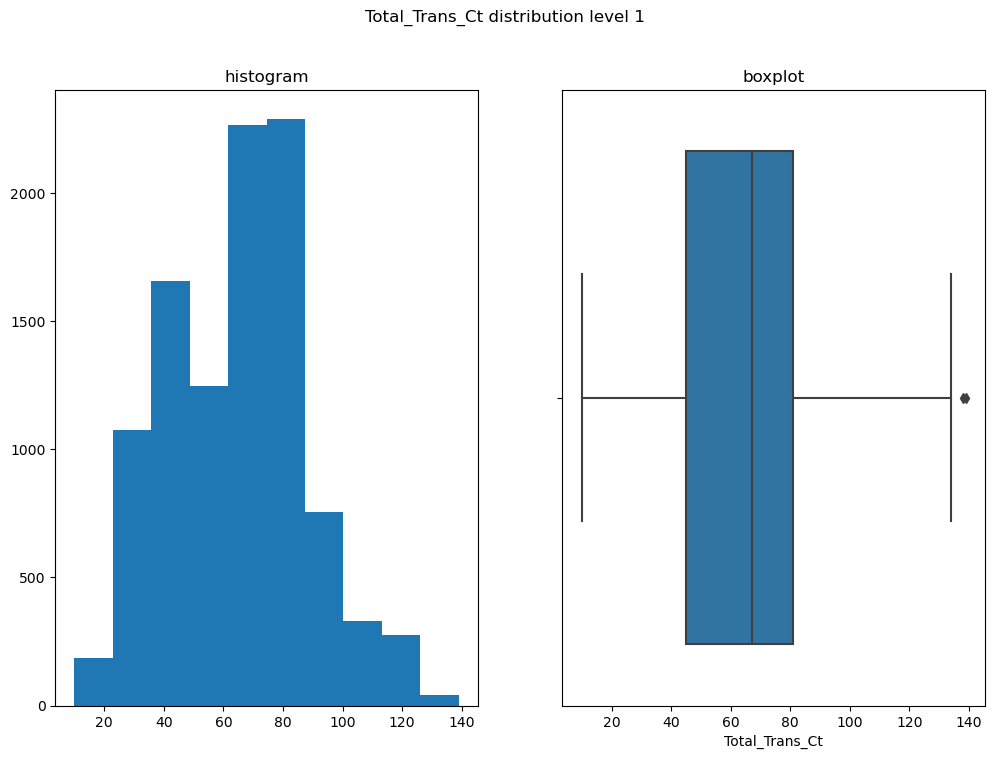

In [115]:
fig, ax=plt.subplots(1,2, figsize=(12,8))
ax[0].set_title('histogram')
ax[0].hist(df2['Total_Trans_Ct'])
ax[1].set_title('boxplot')
sns.boxplot(data=df2, x= 'Total_Trans_Ct',ax=ax[1])
plt.suptitle('Total_Trans_Ct distribution level 1')
plt.show()

In [116]:
q1= df2['Total_Trans_Ct'].quantile(0.25)
q3= df2['Total_Trans_Ct'].quantile(0.75)
iqr= q3-q1
lf= q1-1.5*iqr
uf= q3+1.5*iqr
med= df2['Total_Trans_Ct'].median()
print(lf,uf,med)

-9.0 135.0 67.0


In [117]:
condition = (df2['Total_Trans_Ct']<lf) | (df2['Total_Trans_Ct']>uf )
df2.loc[condition, 'Total_Trans_Ct'] = med

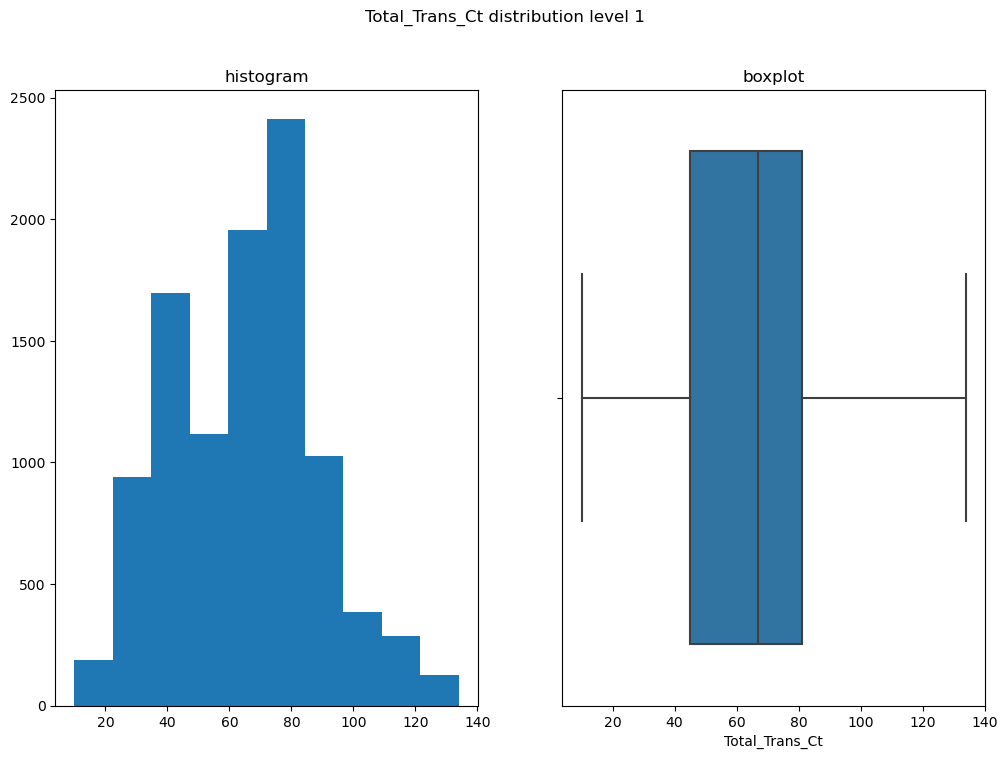

In [118]:
fig, ax=plt.subplots(1,2, figsize=(12,8))
ax[0].set_title('histogram')
ax[0].hist(df2['Total_Trans_Ct'])
ax[1].set_title('boxplot')
sns.boxplot(data=df2, x= 'Total_Trans_Ct',ax=ax[1])
plt.suptitle('Total_Trans_Ct distribution level 1')
plt.show()

### Avg Utilization Ratio Level 1 Analysis

In [119]:
df2['Avg_Utilization_Ratio']

0        0.061
1        0.105
2        0.000
3        0.760
4        0.000
         ...  
10122    0.462
10123    0.511
10124    0.000
10125    0.000
10126    0.189
Name: Avg_Utilization_Ratio, Length: 10127, dtype: float64

In [120]:
Avg_Utilization_Ratio=df2['Avg_Utilization_Ratio'].value_counts()
Avg_Utilization_Ratio

Avg_Utilization_Ratio
0.000    2470
0.073      44
0.057      33
0.048      32
0.060      30
         ... 
0.927       1
0.935       1
0.954       1
0.385       1
0.009       1
Name: count, Length: 964, dtype: int64

In [121]:
df2.Avg_Utilization_Ratio.isnull().sum()

0

In [122]:
avg=df2['Avg_Utilization_Ratio'].mean()
median=df2['Avg_Utilization_Ratio'].median()
mode=df2['Avg_Utilization_Ratio'].mode()
var=df2['Avg_Utilization_Ratio'].var()
std=df2['Avg_Utilization_Ratio'].std()
maximum=df2['Avg_Utilization_Ratio'].max()
minimum=df2['Avg_Utilization_Ratio'].min()
range_credit=maximum-minimum
total_credit=df2['Avg_Utilization_Ratio'].sum()

In [123]:
print('Mean is ', avg)
print('Median is ', median)
print('Mode is ', mode)
print('Variance is ', var)
print('std is ', std)
print('Maximum is ', maximum)
print('Minimum is ', minimum)
print('Range is ', range_credit)
print('Total credit is ', total_credit)

Mean is  0.2748935518909845
Median is  0.176
Mode is  0    0.0
Name: Avg_Utilization_Ratio, dtype: float64
Variance is  0.07600578621854333
std is  0.2756914692523933
Maximum is  0.999
Minimum is  0.0
Range is  0.999
Total credit is  2783.847


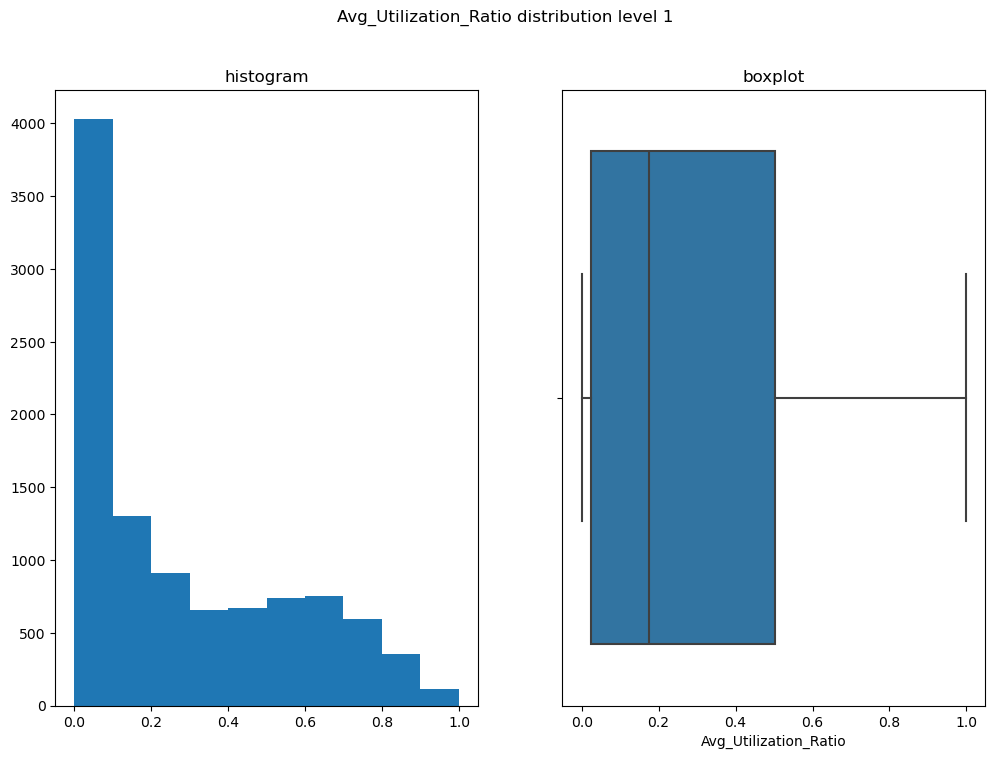

In [124]:
fig, ax=plt.subplots(1,2, figsize=(12,8))
ax[0].set_title('histogram')
ax[0].hist(df2['Avg_Utilization_Ratio'])
ax[1].set_title('boxplot')
sns.boxplot(data=df2, x= 'Avg_Utilization_Ratio',ax=ax[1])
plt.suptitle('Avg_Utilization_Ratio distribution level 1')
plt.show()